## Creating dataset

In [63]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_moons, make_circles
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

Creating three types of datasets using make_blobs ([docmentation](https://scikit-learn.org/stable/auto_examples/cluster/plot_linkage_comparison.html#sphx-glr-auto-examples-cluster-plot-linkage-comparison-py)). 

1. Using make_blobs
2. Using make_moons
3. Using make_circles

First five rows and col values 
X1 : 
 [[2.51526543 1.11143935]
 [1.8155981  1.11969719]
 [2.69637316 0.62563218]
 [1.67280531 0.65930057]
 [1.89593761 5.18540259]]  
 y1 :
 [ 1  1  1  1 -1]


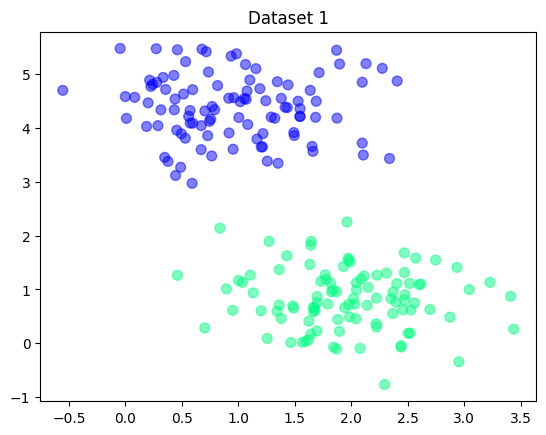

In [64]:
X1, y1 = make_blobs(n_samples=200, centers=2,random_state=0, cluster_std=0.60)
y1 = np.where(y1 <= 0, -1, 1)
print("First five rows and col values \nX1 : \n",X1[:5], " \n y1 :\n",y1[:5])
plt.scatter(X1[:, 0], X1[:, 1], c=y1, s=50, cmap='winter', alpha=.5)
plt.title("Dataset 1")
plt.show()

First five rows and col values 
X2 : 
 [[ 0.45061932  0.8999188 ]
 [-0.49107622  0.88175465]
 [ 0.02103556  0.50742561]
 [ 1.52828422 -0.33718357]
 [-0.10086197  0.42660783]]  
 y2 :
 [ 1  1  1  1 -1]


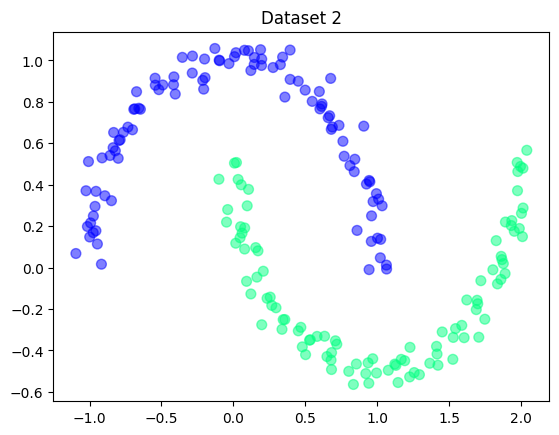

In [65]:
X2, y2 = make_moons(n_samples=200, noise=.05)
y2 = np.where(y2 <= 0, -1, 1)
print("First five rows and col values \nX2 : \n",X2[:5], " \n y2 :\n",y1[:5])
plt.scatter(X2[:, 0], X2[:, 1], c=y2, s=50, cmap='winter', alpha=.5)
plt.title("Dataset 2")
plt.show()

In [66]:
print(X1.shape)
print(y1.shape)

(200, 2)
(200,)


First five rows and col values 
X1 : 
 [[ 0.85283371  0.534659  ]
 [ 0.50766628 -0.01019034]
 [ 0.46052022  0.90805567]
 [ 0.99398594 -0.27811166]
 [-0.35395942  0.18738075]]  
 y3 :
 [ 1  1  1  1 -1]


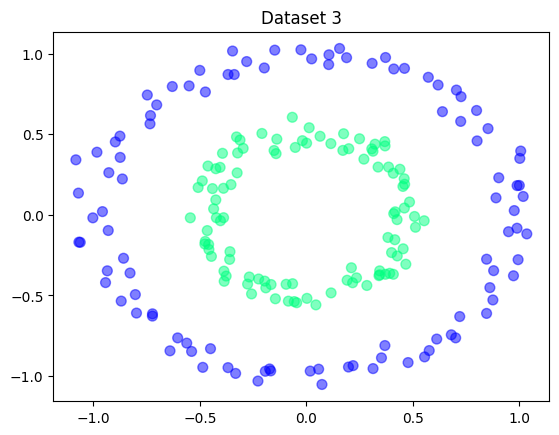

In [67]:
X3, y3 = noisy_circles = make_circles(n_samples=200, factor=.5, noise=.05)
y3 = np.where(y3 <= 0, -1, 1)
print("First five rows and col values \nX1 : \n",X3[:5], " \n y3 :\n",y1[:5])
plt.scatter(X3[:, 0], X3[:, 1], c=y3, s=50, cmap='winter', alpha=.5)
plt.title("Dataset 3")
plt.show()

<hr>
<br>
<br>
<center><h1> Creating SVM models </h1></center>
<br><br><br>

## Without kernals

For a n-dimensional feature, SVM creates an n-1 dimensional hyperplane to seperate the classes.
Any hyperplane can be represented as:

<mark> w<sup>T</sup>X -b = 0 </mark>

For example, if we have a dataset which can be represented by a line, hyperplane would be a point. In our case we have 2 independent and 1 dependent feature. Thus, our hyperplane is a line with the quation: 

<mark> y = w<sub>1</sub>X<sub>1</sub> + w<sub>2</sub>X<sub>2</sub> - b </mark>

where, w = [ w<sub>1</sub>, w<sub>2</sub> ]

We will proceed with the assumption that m<sub>1</sub>, m<sub>2</sub> and b are 0s, and we will update their value in accordane with learning rate. 

### Hard margin

If the dataset can be linearly sperated like our first dataset and partially in the second, we can create two parallel hyperplane(lines here) for each classes and contain each data points under these hyperplanes and our goal would be to maximize the distance between these two parallel hyperplane. The region between these two plane is called **margin**. The equations for both hyperplane is:

<mark>
w<sup>T</sup>X -b = -1 and,<br> 
w<sup>T</sup>X -b = 1 
</mark>

The distance between them is 2/||w|| and to maximize the distance, ||w|| should be minimum. 

To prevent any data point falling inside margin we add the restriction,

<mark>
y<sub>i</sub>(w<sup>T</sup>X<sub>i</sub> -b) >= 1 
</mark>

where y<sub>i</sub> = ith row in the target
and X<sub>i</sub> = ith row in the X


### Soft margin

If the dataset in non-linearly seprable (dataset 2 and 3, **note**: if in dataset 1, one or more points are in wrong classes, then it is also non linear), we can use hinge loss for loss function: <br>

<mark> max(0, 1-y<sub>i</sub>(w<sup>T</sup>X<sub>i</sub> -b)), </mark>

If the datapoint has class = 1, then the loss will be 0, otherwise it will be the distance between the margin and the datapoint.

and our goal is to minimize

<mark>Loss = (1/n) Σ max(0, 1-y<sub>i</sub>(w<sup>T</sup>X<sub>i</sub> -b)) + λ||w||<sup>2</sup> </mark>

where λ is a tradeoff between the margin size and x<sub>i</sub> being on the correct side of margon. If λ is too low, the equation becomes hard margin. 

<h4>Updating weights</h4>

Let's define by how we are updating weights by differntiating both terms in the loss with w<sub>k</sub>:

First term:

<mark>𝛿max(0, 1-y<sub>i</sub>(w<sup>T</sup>X<sub>i</sub> -b ))/𝛿w<sub>k</sub> = { 0, if y<sub>i</sub>x<sub>i</sub>w -b≥1 else -y<sub>i</sub>x<sub>i</sub> }</mark>

Second term:

<mark>𝛿(λ||w||<sup>2</sup>)/𝛿w<sub>k</sub> = 2λw</mark>

If y<sub>i</sub>x<sub>i</sub>w-b≥1

<mark>w = w - α* 2λw</mark>

else,

<mark>w = w + α* (2λw - y<sub>i</sub>x<sub>i</sub>)</mark>

<h4>Updating intercept</h4>

Differentiaite loss by b

First term:

<mark>𝛿max(0, 1-y<sub>i</sub>(w<sup>T</sup>X<sub>i</sub> -b ))/𝛿b = { 0, if y<sub>i</sub>x<sub>i</sub>w -b≥1 else -y<sub>i</sub> }</mark>

Second term:

<mark>𝛿(λ||w||<sup>2</sup>)/𝛿b = 0</mark>


If y<sub>i</sub>x<sub>i</sub>w-b≥1

<mark>b = b + α*0</mark>

else,

<mark> b = b - α* (y<sub>i</sub>) </mark>


**Note**:

<h4>Slack Variable</h4>

Sometimes we have to allow few points to be inside margin. Slack veriable defines how much we can violate the margin which means how many points can be inside the margin.

<mark>
y<sub>i</sub>(w<sup>T</sup>X<sub>i</sub> -b) >= 1 - ξ<sub>i</sub>
</mark>


<br>
<br>

**References**: 

1. [Support-vector machine, wikipedia](https://en.wikipedia.org/wiki/Support-vector_machine) 
2. [Support Vector Machine — Introduction to Machine Learning Algorithms, Medium](https://towardsdatascience.com/support-vector-machine-introduction-to-machine-learning-algorithms-934a444fca47). 
3. [A Support Vector Machine in just a few Lines of Python Code](https://maviccprp.github.io/a-support-vector-machine-in-just-a-few-lines-of-python-code/)

Please go through these if have facing any difficuly in understanding the implementation.


In [68]:
class SVM_soft_margin:

    def __init__(self, alpha = 0.001, lambda_ = 0.01, n_iterations = 1000):
        self.alpha = alpha # learning rate
        self.lambda_ = lambda_ # tradeoff
        self.n_iterations = n_iterations # number of iterations
        self.w = None # weights or slopes
        self.b = None # intercept


    def fit(self, X, y):
        
        n_samples, n_features = X.shape        
        self.w = np.zeros(n_features) # initalizing with 0
        self.b = 0 # initializewith 0
        
        for iteration in range(self.n_iterations):
            for i, Xi in enumerate(X):
                # yixiw-b≥1
                    ### ENTER YOUR CODE ###
                if y[i]* (np.dot(Xi, self.w) - self.b) >= 1:
                    # w = w + α* (2λw - yixi)
                    ### ENTER YOUR CODE ###
                    self.w = self.w + self.alpha * (2 * self.lambda_ * self.w - np.dot(y[i], Xi))
                else:
                    # w = w + α* (2λw - yixi)
                    ### ENTER YOUR CODE ###
                    self.w = self.w + self.alpha * (2 * self.lambda_ * self.w - np.dot(y[i], Xi))
                    # b = b - α* (yi)
                    ### ENTER YOUR CODE ###
                    self.b = self.b - self.alpha * y[i]
        return self.w, self.b


    def predict(self, X):
        pred = np.dot(X, self.w) - self.b 
        # returning in the form of -1 and 1
        ### ENTER YOUR CODE ###
        result = np.where(pred <= 0, -1, 1)
        return result

In [69]:
def get_hyperplane(x, w, b, offset):
        ### ENTER YOUR CODE ###
        return (-w[0] * x + b + offset) / w[1]

In [70]:
def plot_svm(X, y, w, b, title ='Plot for linear SVM'):    

    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    plt.scatter(X[:,0], X[:,1], marker='o',c=y)

    x0_1 = np.amin(X[:,0])
    x0_2 = np.amax(X[:,0])

    x1_1 = get_hyperplane(x0_1, w, b, 0)
    x1_2 = get_hyperplane(x0_2, w, b, 0)

    x1_1_m = get_hyperplane(x0_1, w, b, -1)
    x1_2_m = get_hyperplane(x0_2, w, b, -1)

    x1_1_p = get_hyperplane(x0_1, w, b, 1)
    x1_2_p = get_hyperplane(x0_2, w, b, 1)

    ax.plot([x0_1, x0_2],[x1_1, x1_2], 'y--')
    ax.plot([x0_1, x0_2],[x1_1_m, x1_2_m], 'k')
    ax.plot([x0_1, x0_2],[x1_1_p, x1_2_p], 'k')

    x1_min = np.amin(X[:,1])
    x1_max = np.amax(X[:,1])
    ax.set_ylim([x1_min-3,x1_max+3])
    
    plt.title(title)
    plt.show()

**Note** : I am using accuracy_score as we are dealing with classification problems.
r2_score is used for regression analysis (used in the Linear regression notebook)

For dataset 1, score: 0.35


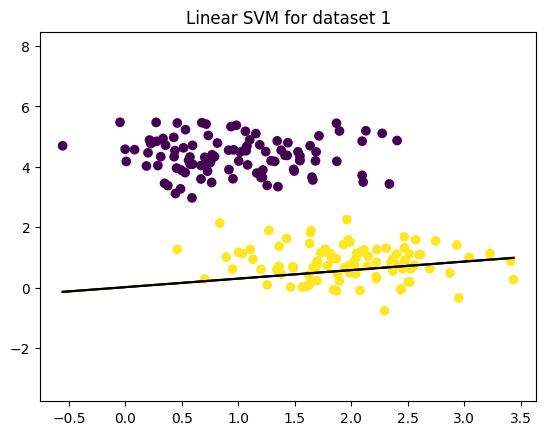

In [71]:
svm1 = SVM_soft_margin()
w1,b1 = svm1.fit(X1,y1)
print("For dataset 1, score:" ,accuracy_score(svm1.predict(X1),y1))
plot_svm(X1, y1, w1, b1, title= 'Linear SVM for dataset 1')

For dataset 2, score: 0.22


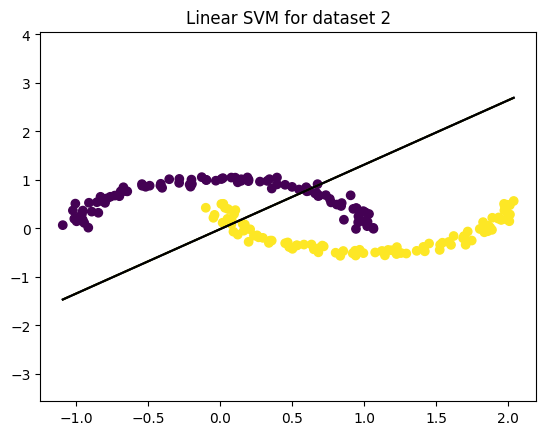

In [72]:
svm2 = SVM_soft_margin()
w2,b2 = svm2.fit(X2,y2)
print("For dataset 2, score:" ,accuracy_score(svm2.predict(X2),y2))
plot_svm(X2, y2, w2, b2, title= 'Linear SVM for dataset 2')

For dataset 3, score: 0.525


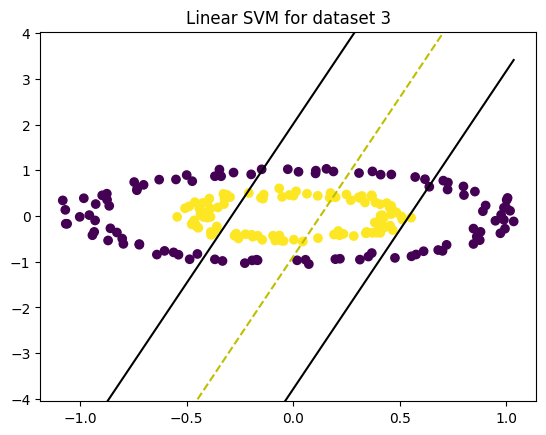

In [73]:
svm3 = SVM_soft_margin()
w3,b3 = svm3.fit(X3,y3)
print("For dataset 3, score:" ,accuracy_score(svm3.predict(X3),y3))
plot_svm(X3, y3, w3, b3, title= 'Linear SVM for dataset 3')

<br><br>
<hr>
<br><br>
<center><h2>SVM for Non-Linear Dataset using Kernal</h2><center>

To use SVM for Non-Linear dataset, we have to develop a dual SVM. The maths behind it is a bit complicated so please refer the links below in the order:

1. [Support Vector Machines for Beginners – Duality Problem](http://www.adeveloperdiary.com/data-science/machine-learning/support-vector-machines-for-beginners-duality-problem/)
2. [Support Vector Machines for Beginners – Kernel SVM](http://www.adeveloperdiary.com/data-science/machine-learning/support-vector-machines-for-beginners-kernel-svm/)
3. [Support Vector Machines for Beginners – Training Algorithms](http://www.adeveloperdiary.com/data-science/machine-learning/support-vector-machines-for-beginners-training-algorithms/)

<h4>Loss</h4>
The Dual Lagrangian loss function which we are trying to maximize is:

<mark>L<sub>dual</sub> = ∑α<sub>i</sub> – (1/2) ∑<sub>i</sub> ∑<sub>j</sub> α<sub>i</sub> α<sub>j</sub> y<sub>i</sub> y<sub>j</sub> K(x<sub>i</sub>, x<sub>j</sub>) </mark>

<h4>Gradient</h4>

Differentiating the loss wrt α<sub>k</sub> , using kth term for Gradient Ascent:

<mark>δL<sub>dual</sub>/δα<sub>k</sub> = 1 – y<sub>k</sub> ∑ α<sub>j</sub> y<sub>j</sub> K(x<sub>j</sub>, x<sub>k</sub>)</mark>

where, <br>

K(x<sub>i</sub>, x<sub>j</sub>) is our Kernal function which could be linear, polynomial or gaussian(rbf).

<h4>Updates</h4>

α = α + η*(gradient)

where η = learning rate

After training, calculate intercept b:

<mark>b = avg<sub>C≤αi≤0</sub>{ y<sub>i</sub> – ∑α<sub>j</sub>y<sub>j</sub> K(x<sub>j</sub>, x<sub>i</sub>) }</mark>

<h4>Prediction </h4>

For α>0 :

<mark>y^ = sign( ∑ α<sub>i</sub>y<sub>i</sub> k(x<sub>i</sub>, x<sub>i</sub>)+b)</mark>

1. Polynomial = (c + X.y)<sup>degree</sup>

2. Gaussian = e <sup> -(1/ σ<sup>2</sup>) ||X-y|| <sup>2</sup> </sup> 

In [74]:
class SVM_Dual:

    def __init__(self, kernel='poly', degree=2, sigma=0.1, epoches=1000, learning_rate= 0.001):
        self.alpha = None
        self.b = 0
        self.degree = degree
        self.c = 1
        self.C = 1
        self.sigma = sigma
        self.epoches = epoches
        self.learning_rate = learning_rate

        if kernel == 'poly':
            self.kernel = self.polynomial_kernal # for polynomial kernal
        elif kernel == 'rbf':
            self.kernel =  self.gaussian_kernal # for guassian

    def polynomial_kernal(self,X,Z):
        #(c + X.y)^degree
        ### ENTER YOUR CODE ###
        return (self.c + np.dot(X,Z)) ** self.degree
        
    def gaussian_kernal(self, X,Z):
        #e ^-(1/ σ2) ||X-y|| ^2
        ### ENTER YOUR CODE ###
        return np.exp(-1/(self.sigma**2) * np.linalg.norm(X-Z)**2)
    
    def train(self,X,y):
        self.X = X
        self.y = y
        self.alpha = np.random.random(X.shape[0])
        self.b = 0
        self.ones = np.ones(X.shape[0]) 

        ### ENTER YOUR CODE #### yi yj K(xi, xj)
        ### ENTER YOUR CODE ###

        for i in range(self.epoches):
            # 1 – yk ∑ αj yj K(xj, xk)
            # α = α + η*(1 – yk ∑ αj yj K(xj, xk)) to maximize
            # 0<α<C
            # 0<α<C
            # loss: ∑αi – (1/2) ∑i ∑j αi αj yi yj K(xi, xj)
            ### ENTER YOUR CODE ###
            self.alpha = self.alpha + self.learning_rate * (self.ones - self.y * np.sum(self.alpha * self.kernel(self.X, self.X)))
            self.alpha = np.where(self.alpha < 0, 0, self.alpha)
            self.alpha = np.where(self.alpha > self.C, self.C, self.alpha)
            loss = np.sum(self.alpha) - (1/2) * np.sum(self.alpha * self.alpha * self.y * self.y * self.kernel(self.X, self.X))
        
        # for intercept b, we will only consider α which are 0<α<C 
        b_list = []        
        # avgC≤αi≤0{ yi – ∑αjyj K(xj, xi) }
        ### ENTER YOUR CODE ###
        for i in range(self.alpha.shape[0]):
            if self.alpha[i] > 0 and self.alpha[i] < self.C:
                b_list.append(self.y[i] - np.sum(self.alpha * self.y * self.kernel(self.X, self.X[i])))
        self.b = np.mean(b_list)
        
            
    def predict(self, X):
        return np.sign(self.decision_function(X))
    
    def score(self, X, y):
        y_hat = self.predict(X)
        return np.mean(y == y_hat)
    
    def decision_function(self, X):
        return (self.alpha * self.y).dot(self.kernel(self.X, X)) + self.b

    # https://scikit-learn.org/stable/auto_examples/svm/plot_separating_hyperplane.html
    def plot(self, title='Plot for non linear SVM'):
        plt.scatter(self.X[:, 0], self.X[:, 1], c=self.y, s=50, cmap='winter', alpha=.5)
        ax = plt.gca()
        xlim = ax.get_xlim()
        ylim = ax.get_ylim()
        xx = np.linspace(xlim[0], xlim[1], 50)
        yy = np.linspace(ylim[0], ylim[1], 50)
        YY, XX = np.meshgrid(yy, xx)
        xy = np.vstack([XX.ravel(), YY.ravel()]).T
        Z = self.decision_function(xy).reshape(XX.shape)
        ax.contour(XX, YY, Z, levels=[-1, 0, 1],linestyles=['--', '-', '--'])
        plt.title(title)
        plt.show()

In [75]:
print(X1.shape)
print(y1.shape)

(200, 2)
(200,)


Accuracy:  0.0


ValueError: operands could not be broadcast together with shapes (200,2) (2500,2) 

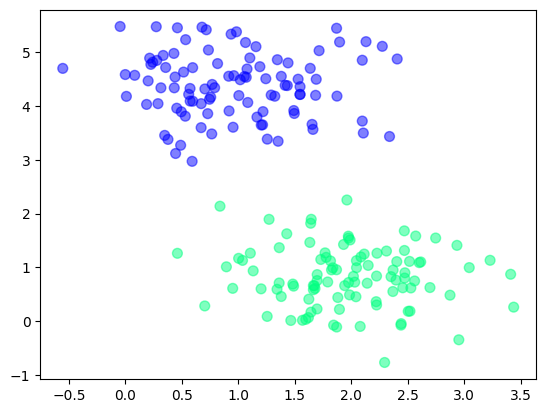

In [79]:
#dataset 1, using gaussian
svm_dual1 = SVM_Dual(kernel = 'rbf')
svm_dual1.train(X1,y1)
print("Accuracy: ", svm_dual1.score(X1,y1))
svm_dual1.plot('Non linear SVM plot for Dataset 1 usign rbf')

Accuracy:  0.0


ValueError: operands could not be broadcast together with shapes (200,2) (2500,2) 

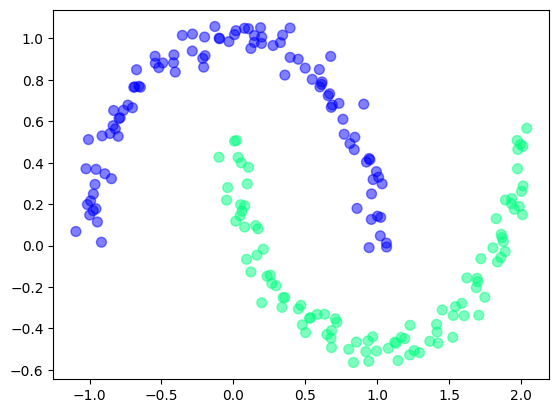

In [80]:
#dataset 2, using gaussian
svm_dual2 = SVM_Dual(kernel = 'rbf')
svm_dual2.train(X2,y2)
print("Accuracy: ", svm_dual2.score(X2,y2))
svm_dual2.plot('Non linear SVM plot for Dataset 2 usign rbf')

In [81]:
# using polynomial with degree 2, because its circular
svm_dual3 = SVM_Dual(kernel='poly', degree=2)
svm_dual3.train(X3,y3)
print(svm_dual3.score(X3,y3))
svm_dual3.plot('Non linear SVM plot for Dataset 3 usign polynomial with degree 2')

ValueError: shapes (200,2) and (200,2) not aligned: 2 (dim 1) != 200 (dim 0)

## Working with the pre-defined SVM Library

In [ ]:
# https://scikit-learn.org/stable/auto_examples/svm/plot_separating_hyperplane.html

# defining a function to plot decision boundary according to the svm model
def plot(X, y, svm, title='SVM plot'):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

    # plot the decision function
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = svm.decision_function(xy).reshape(XX.shape)

    # plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    # plot support vectors
    ax.scatter(svm.support_vectors_[:, 0], svm.support_vectors_[:, 1], s=100,
               linewidth=1, facecolors='none', edgecolors='k')
    plt.title(title)
    plt.show()

In [ ]:
# for dataset 1
# creating testing and training set
### ENTER YOUR CODE ###

# using linear kernal as our margin is a line
# training the model
### ENTER YOUR CODE ###

# accurcy print
print("Test accuracy", accuracy_score(svm1.predict(X_test), y_test))
print("Train accuracy", accuracy_score(svm1.predict(X_train), y_train))

plot(X1, y1, svm1, title='SVM plot for dataset 1 using linear kernel')

NameError: name 'X_test' is not defined

In [ ]:
# for dataset 2
# creating testing and training set
### ENTER YOUR CODE ###

# using rbf kernal as our margin is non linear
### ENTER YOUR CODE ###
# training the model
### ENTER YOUR CODE ###

# accurcy print
print("Test accuracy", accuracy_score(svm2.predict(X_test), y_test))
print("Train accuracy", accuracy_score(svm2.predict(X_train), y_train))
plot(X2, y2, svm2, title='SVM plot for dataset 2 using rbf kernel')

In [ ]:
# for dataset 3
# creating testing and training set
### ENTER YOUR CODE ###

# using poly with degree 2 as our margin is circular
### ENTER YOUR CODE ###
# training the model
### ENTER YOUR CODE ###

# accurcy print
print("Test accuracy", accuracy_score(svm3.predict(X_test), y_test))
print("Train accuracy", accuracy_score(svm3.predict(X_train), y_train))
plot(X3, y3, svm3, title='SVM plot for dataset 3 using polynomial kernel')

## Thank you